# Problem statement

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

# About Dataset

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#importing data into pandas 

In [2]:
df=pd.read_csv("Insurance Claim Fraud Detection.csv")

#Top 10  data of dataset

In [3]:
df.head(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   
5                 256   39         104594       12-10-2006           OH   
6                 137   34         413978       04-06-2000           IN   
7                 165   37         429027       03-02-1990           IL   
8                  27   33         485665       05-02-1997           IL   
9                 212   42         636550       25-07-2011           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   
7    100/300               1000                1137.03               0   
8    100/300                500                1442.99               0   
9    100/300                500                1315.68               0   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   
5       478456  ...         2                      NO              64100   
6       441716  ...         0                       ?              78650   
7       603195  ...         2                     YES              51590   
8       601734  ...         1                     YES              27700   
9       600983  ...         1                       ?              42300   

  injury_claim property_claim  vehicle_claim  auto_make  auto_model auto_year  \
0         6510          13020          52080       Saab         92x      2004   
1          780            780           3510   Mercedes        E400      2007   
2         7700           3850          23100      Dodge         RAM      2007   
3         6340           6340          50720  Chevrolet       Tahoe      2014   
4         1300            650           4550     Accura         RSX      2009   
5         6410           6410          51280       Saab          95      2003   
6        21450           7150          50050     Nissan  Pathfinder      2012   
7         9380           9380          32830       Audi          A5      2015   
8         2770           2770          22160     Toyota       Camry      2012   
9         4700           4700          32900       Saab         92x      1996   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  
5              Y  
6              N  
7              N  
8              N  
9              N  

[10 rows x 39 columns]

In [4]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[5 rows x 39 columns]

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       '1ncident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

#Here we are importing inormation about data type ,type of data, no of columns,memory used,

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [145]:
df.describe()

months_as_customer          age  policy_number  policy_bind_date  \
count         1000.000000  1000.000000    1000.000000       1000.000000   
mean           203.954000    38.948000  546238.648000        474.332000   
std            115.113174     9.140287  257063.005276        275.402851   
min              0.000000    19.000000  100804.000000          0.000000   
25%            115.750000    32.000000  335980.250000        233.750000   
50%            199.500000    38.000000  533135.000000        472.500000   
75%            276.250000    44.000000  759099.750000        713.250000   
max            479.000000    64.000000  999435.000000        950.000000   

       policy_state   policy_csl  policy_deductable  policy_annual_premium  \
count    1000.00000  1000.000000        1000.000000            1000.000000   
mean        1.01400     0.951000        1136.000000            1256.406150   
std         0.83096     0.804516         611.864673             244.167395   
min         0.00000     0.000000         500.000000             433.330000   
25%         0.00000     0.000000         500.000000            1089.607500   
50%         1.00000     1.000000        1000.000000            1257.200000   
75%         2.00000     2.000000        2000.000000            1415.695000   
max         2.00000     2.000000        2000.000000            2047.590000   

       umbrella_limit    insured_zip  ...    witnesses  \
count    1.000000e+03    1000.000000  ...  1000.000000   
mean     1.101000e+06  501214.488000  ...     1.487000   
std      2.297407e+06   71701.610941  ...     1.111335   
min     -1.000000e+06  430104.000000  ...     0.000000   
25%      0.000000e+00  448404.500000  ...     1.000000   
50%      0.000000e+00  466445.500000  ...     1.000000   
75%      0.000000e+00  603251.000000  ...     2.000000   
max      1.000000e+07  620962.000000  ...     3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count              1000.000000          1000.00000   1000.000000   
mean                  0.971000         52761.94000   7433.420000   
std                   0.810442         26401.53319   4880.951853   
min                   0.000000           100.00000      0.000000   
25%                   0.000000         41812.50000   4295.000000   
50%                   1.000000         58055.00000   6775.000000   
75%                   2.000000         70592.50000  11305.000000   
max                   2.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_make   auto_model    auto_year  \
count     1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean      7399.570000   37928.950000     6.546000    19.318000  2005.103000   
std       4824.726179   18886.252893     4.034869    11.136107     6.015861   
min          0.000000      70.000000     0.000000     0.000000  1995.000000   
25%       4445.000000   30292.500000     3.000000    10.000000  2000.000000   
50%       6750.000000   42100.000000     7.000000    20.000000  2005.000000   
75%      10885.000000   50822.500000    10.000000    29.000000  2010.000000   
max      23670.000000   79560.000000    13.000000    38.000000  2015.000000   

       fraud_reported  
count     1000.000000  
mean         0.247000  
std          0.431483  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 39 columns]

#in below Putting it all together, df.describe(include="all") will give you descriptive statistics for all columns in the DataFrame df, including both numeric and non-numeric columns. This includes count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for numeric columns, and count, unique, top, and frequency for non-numeric columns.

In [8]:
df.describe(include="all")

months_as_customer          age  policy_number policy_bind_date  \
count          1000.000000  1000.000000    1000.000000             1000   
unique                 NaN          NaN            NaN              951   
top                    NaN          NaN            NaN       01-01-2006   
freq                   NaN          NaN            NaN                3   
mean            203.954000    38.948000  546238.648000              NaN   
std             115.113174     9.140287  257063.005276              NaN   
min               0.000000    19.000000  100804.000000              NaN   
25%             115.750000    32.000000  335980.250000              NaN   
50%             199.500000    38.000000  533135.000000              NaN   
75%             276.250000    44.000000  759099.750000              NaN   
max             479.000000    64.000000  999435.000000              NaN   

       policy_state policy_csl  policy_deductable  policy_annual_premium  \
count          1000       1000        1000.000000            1000.000000   
unique            3          3                NaN                    NaN   
top              OH    250/500                NaN                    NaN   
freq            352        351                NaN                    NaN   
mean            NaN        NaN        1136.000000            1256.406150   
std             NaN        NaN         611.864673             244.167395   
min             NaN        NaN         500.000000             433.330000   
25%             NaN        NaN         500.000000            1089.607500   
50%             NaN        NaN        1000.000000            1257.200000   
75%             NaN        NaN        2000.000000            1415.695000   
max             NaN        NaN        2000.000000            2047.590000   

        umbrella_limit    insured_zip  ...    witnesses  \
count     1.000000e+03    1000.000000  ...  1000.000000   
unique             NaN            NaN  ...          NaN   
top                NaN            NaN  ...          NaN   
freq               NaN            NaN  ...          NaN   
mean      1.101000e+06  501214.488000  ...     1.487000   
std       2.297407e+06   71701.610941  ...     1.111335   
min      -1.000000e+06  430104.000000  ...     0.000000   
25%       0.000000e+00  448404.500000  ...     1.000000   
50%       0.000000e+00  466445.500000  ...     1.000000   
75%       0.000000e+00  603251.000000  ...     2.000000   
max       1.000000e+07  620962.000000  ...     3.000000   

       police_report_available total_claim_amount  injury_claim  \
count                     1000         1000.00000   1000.000000   
unique                       3                NaN           NaN   
top                          ?                NaN           NaN   
freq                       343                NaN           NaN   
mean                       NaN        52761.94000   7433.420000   
std                        NaN        26401.53319   4880.951853   
min                        NaN          100.00000      0.000000   
25%                        NaN        41812.50000   4295.000000   
50%                        NaN        58055.00000   6775.000000   
75%                        NaN        70592.50000  11305.000000   
max                        NaN       114920.00000  21450.000000   

       property_claim  vehicle_claim  auto_make auto_model    auto_year  \
count     1000.000000    1000.000000       1000       1000  1000.000000   
unique            NaN            NaN         14         39          NaN   
top               NaN            NaN       Saab        RAM          NaN   
freq              NaN            NaN         80         43          NaN   
mean      7399.570000   37928.950000        NaN        NaN  2005.103000   
std       4824.726179   18886.252893        NaN        NaN     6.015861   
min          0.000000      70.000000        NaN        NaN  1995.000000   
25%       4445.000000   30292.500000        NaN        NaN  2000.000000   
50%  

In [9]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

#There is no null values present in dataset but some places ? mark is placed

In [10]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
1ncident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [11]:
df.nunique().to_frame("unique values")

unique values
months_as_customer                     391
age                                     46
policy_number                         1000
policy_bind_date                       951
policy_state                             3
policy_csl                               3
policy_deductable                        3
policy_annual_premium                  991
umbrella_limit                          11
insured_zip                            995
insured_sex                              2
insured_education_level                  7
insured_occupation                      14
insured_hobbies                         20
insured_relationship                     6
capital-gains                          338
capital-loss                           354
incident_date                           60
incident_type                            4
collision_type                           4
incident_severity                        4
authorities_contacted                    5
incident_state                           7
incident_city                            7
1ncident_location                     1000
incident_hour_of_the_day                24
number_of_vehicles_involved              4
property_damage                          3
bodily_injuries                          3
witnesses                                4
police_report_available                  3
total_claim_amount                     763
injury_claim                           638
property_claim                         626
vehicle_claim                          726
auto_make                               14
auto_model                              39
auto_year                               21
fraud_reported                           2

# in every column unique value is present

In [12]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
1ncident_location               object
incident_hour_of_the_day 

#There are three types of data is present float64,object,int64

In [13]:
df["vehicle_claim"].value_counts()

5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64

In [14]:
df["property_claim"].value_counts()

0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64

In above (property_claim) each unique value in that column and returns a Series object where the index represents each unique value in the column, and the values represent the count of each unique value. 860 comes 6 times maximum in the above data

In [15]:
df["injury_claim"].value_counts()

0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64

In [16]:
df["total_claim_amount"].value_counts()

59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64

#with the help of dfcor we see the relation between columns,if columns have high corelation then the chance of getting insurance claim is also high

In [17]:
dfcor=df.corr()
dfcor

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651   
total_claim_amount                -0.040344    -0.033873       0.015980   
injury_claim                      -0.045412    -0.017495       0.025934

In [18]:
df=df.drop_duplicates()
print("Rows and columns after dropping:",df.shape)

Rows and columns after dropping: (1000, 39)


# There are no duplicate column in our data set 

<Axes: >

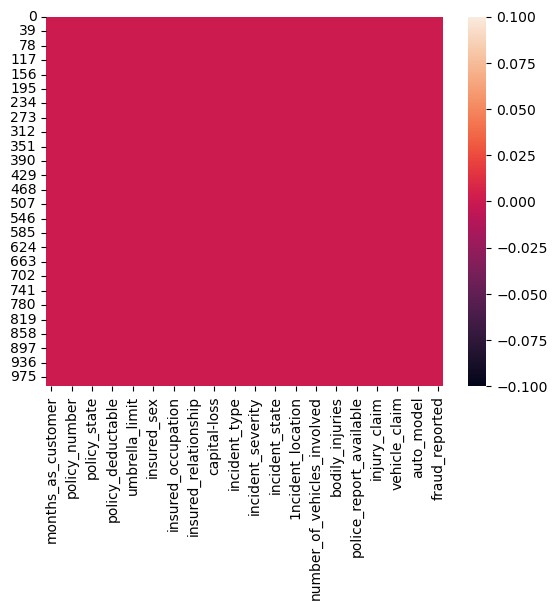

In [19]:
sns.heatmap(df.isnull())

<Axes: >

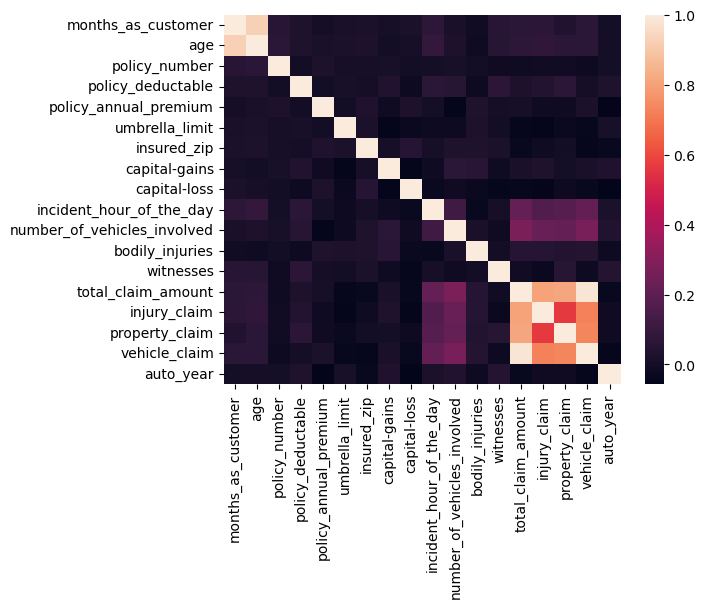

In [20]:
sns.heatmap(dfcor)

<function matplotlib.pyplot.show(close=None, block=None)>

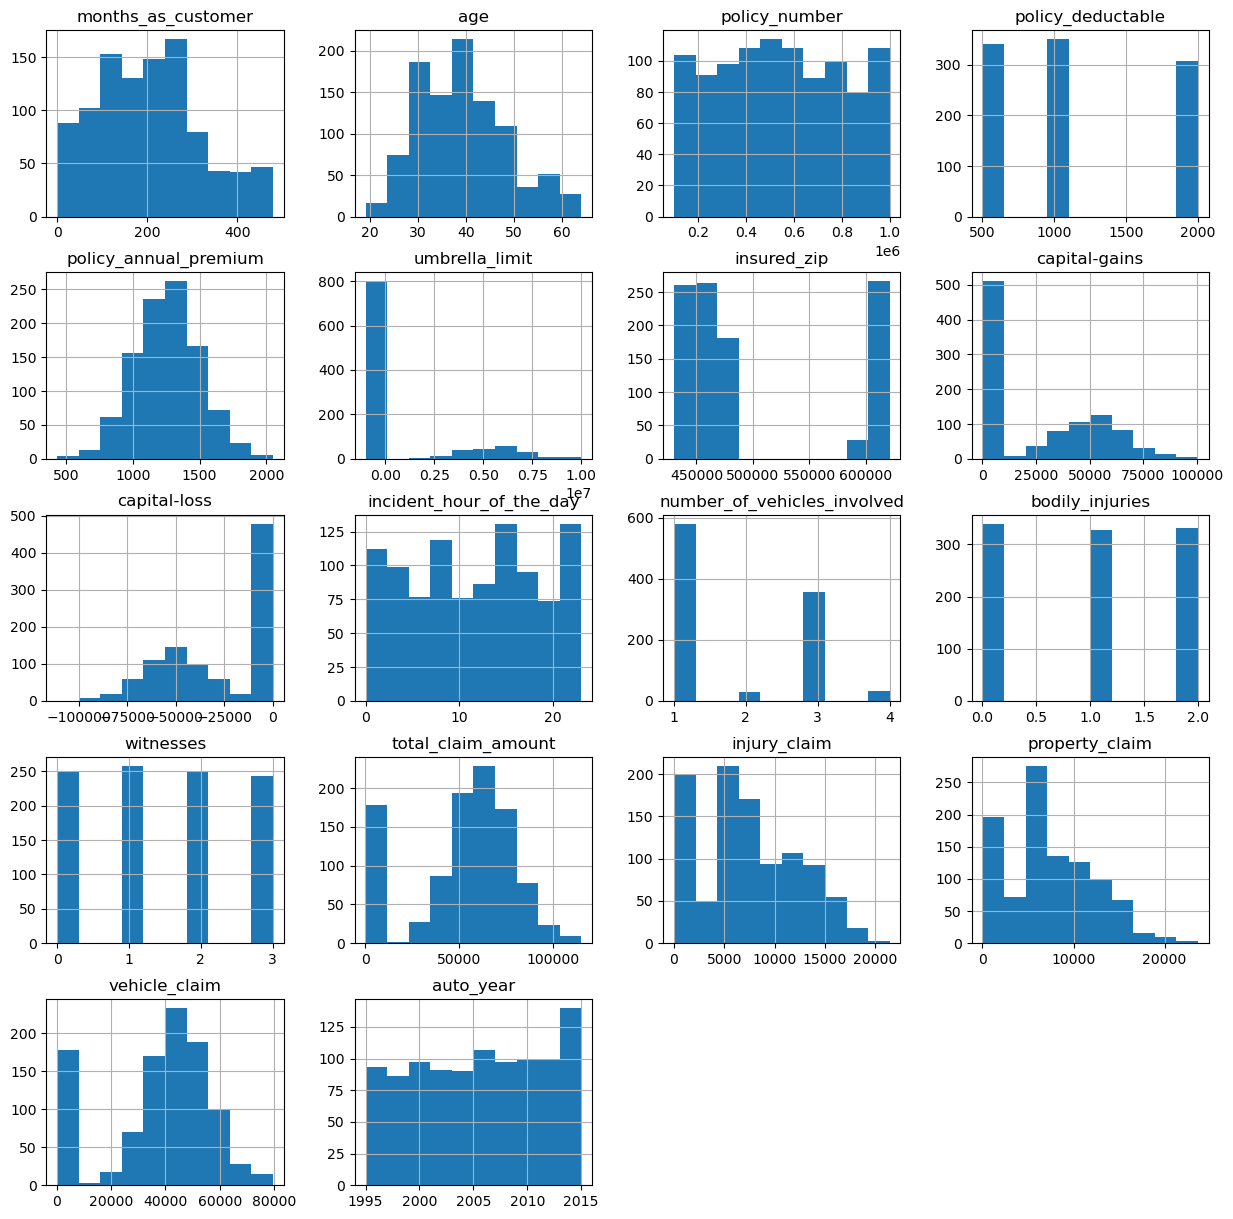

In [21]:
df.hist(figsize=(15,15))
plt.show

months_as_customer                Axes(0.125,0.712609;0.0824468x0.167391)
age                            Axes(0.223936,0.712609;0.0824468x0.167391)
policy_number                  Axes(0.322872,0.712609;0.0824468x0.167391)
policy_deductable              Axes(0.421809,0.712609;0.0824468x0.167391)
policy_annual_premium          Axes(0.520745,0.712609;0.0824468x0.167391)
umbrella_limit                 Axes(0.619681,0.712609;0.0824468x0.167391)
insured_zip                    Axes(0.718617,0.712609;0.0824468x0.167391)
capital-gains                  Axes(0.817553,0.712609;0.0824468x0.167391)
capital-loss                      Axes(0.125,0.511739;0.0824468x0.167391)
incident_hour_of_the_day       Axes(0.223936,0.511739;0.0824468x0.167391)
number_of_vehicles_involved    Axes(0.322872,0.511739;0.0824468x0.167391)
bodily_injuries                Axes(0.421809,0.511739;0.0824468x0.167391)
witnesses                      Axes(0.520745,0.511739;0.0824468x0.167391)
total_claim_amount             Axes(0.

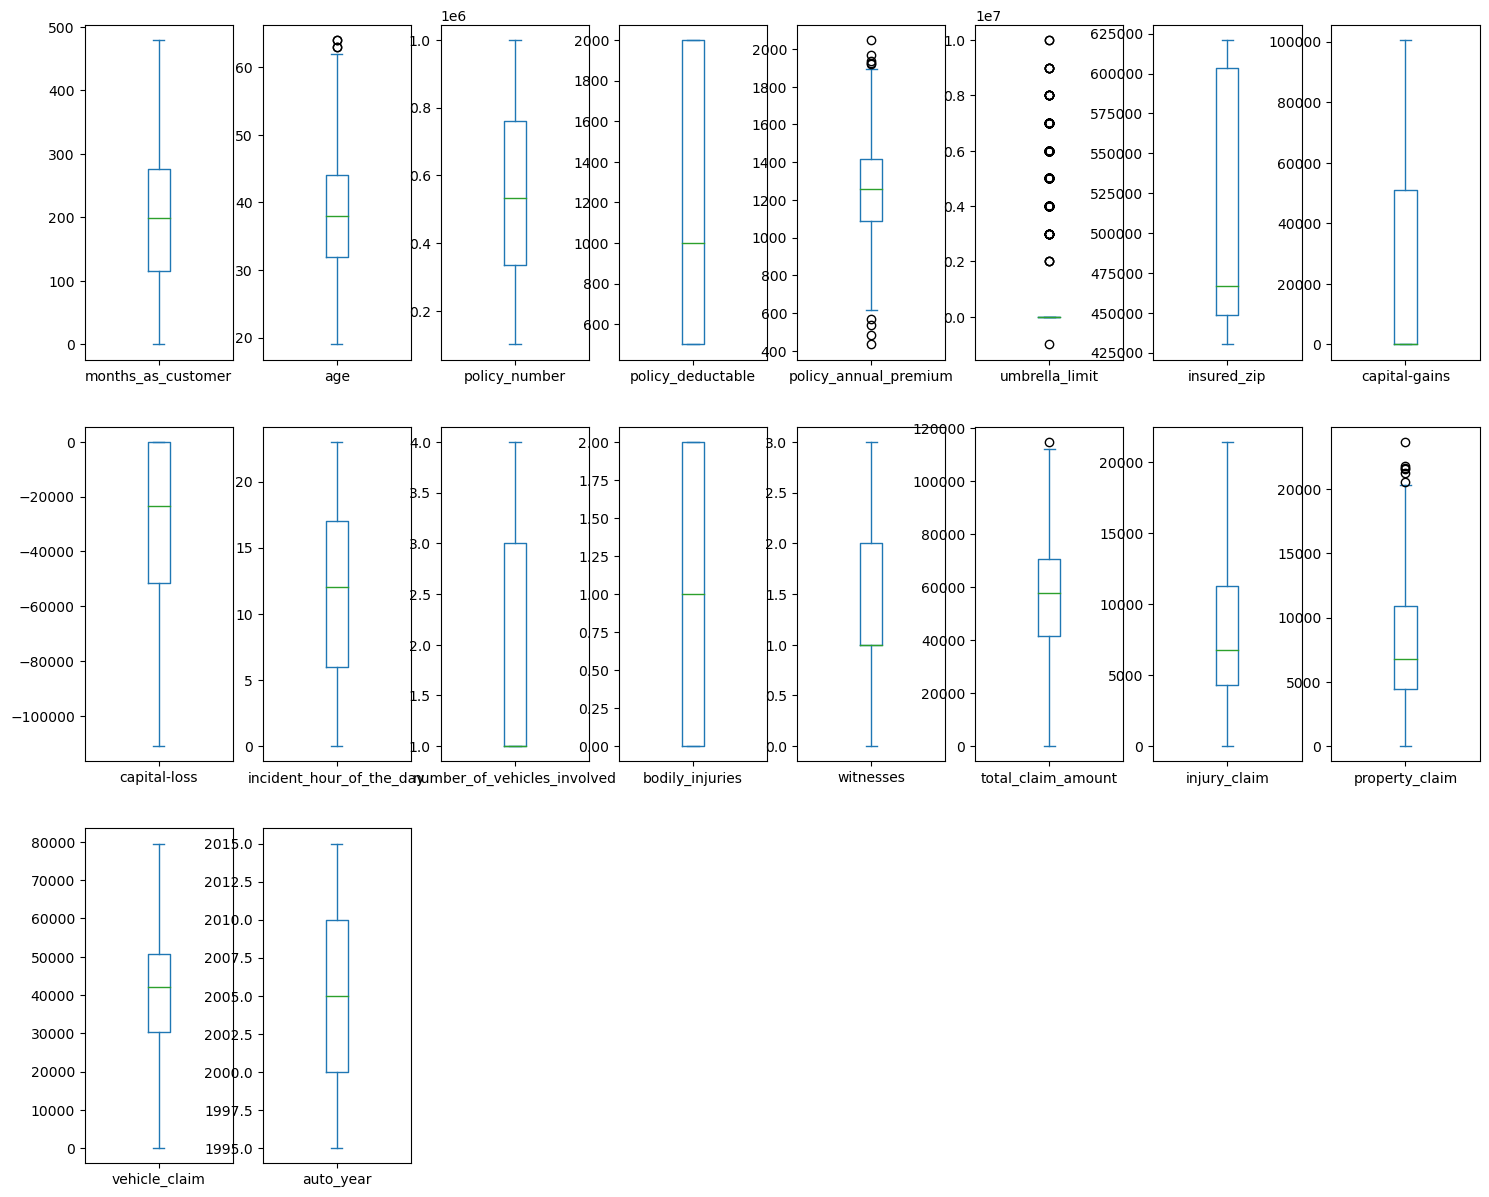

In [22]:
df.plot(kind="box",subplots=True,layout=(4,8),figsize=(18,20))

#from above box plot analysis we clearly see that umbrela_limit has high skewness present and in policy_annual_premium has also some skewness present

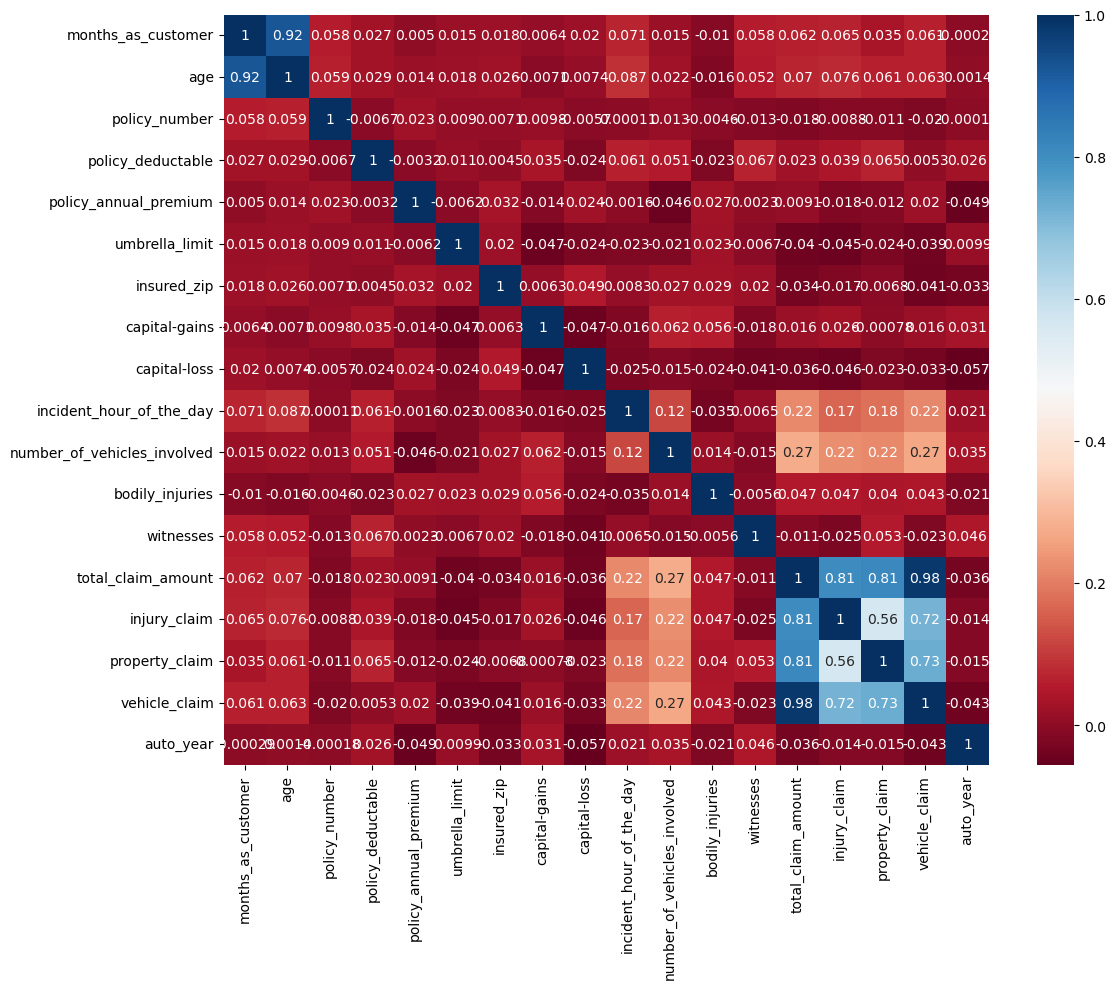

In [23]:
# Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

<Axes: xlabel='witnesses', ylabel='total_claim_amount'>

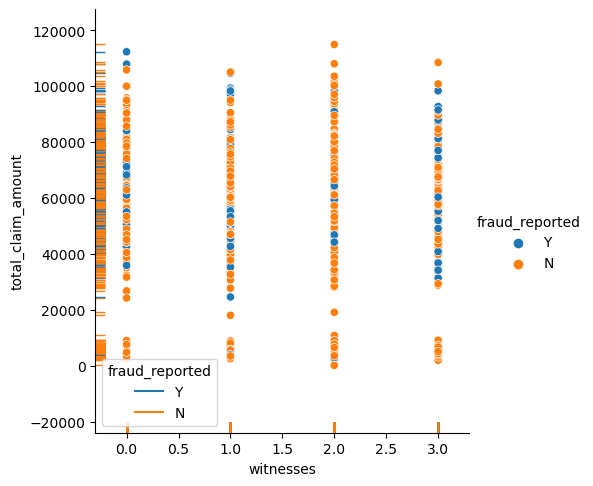

In [25]:
sns.relplot(data=df,x="witnesses",y="total_claim_amount",hue="fraud_reported")
sns.rugplot(data=df,x="witnesses",y="total_claim_amount",hue="fraud_reported",)

#there is less fraud reported from above plot

In [26]:
categorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="O":
        categorical_cols.append(x)
print(f"object data type columns are:\n",categorical_cols)

numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber Data Types Columns are:\n",numerical_cols)

object data type columns are:
 ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', '1ncident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Number Data Types Columns are:
 ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


#Here we divide the data in numerical column and categorical column

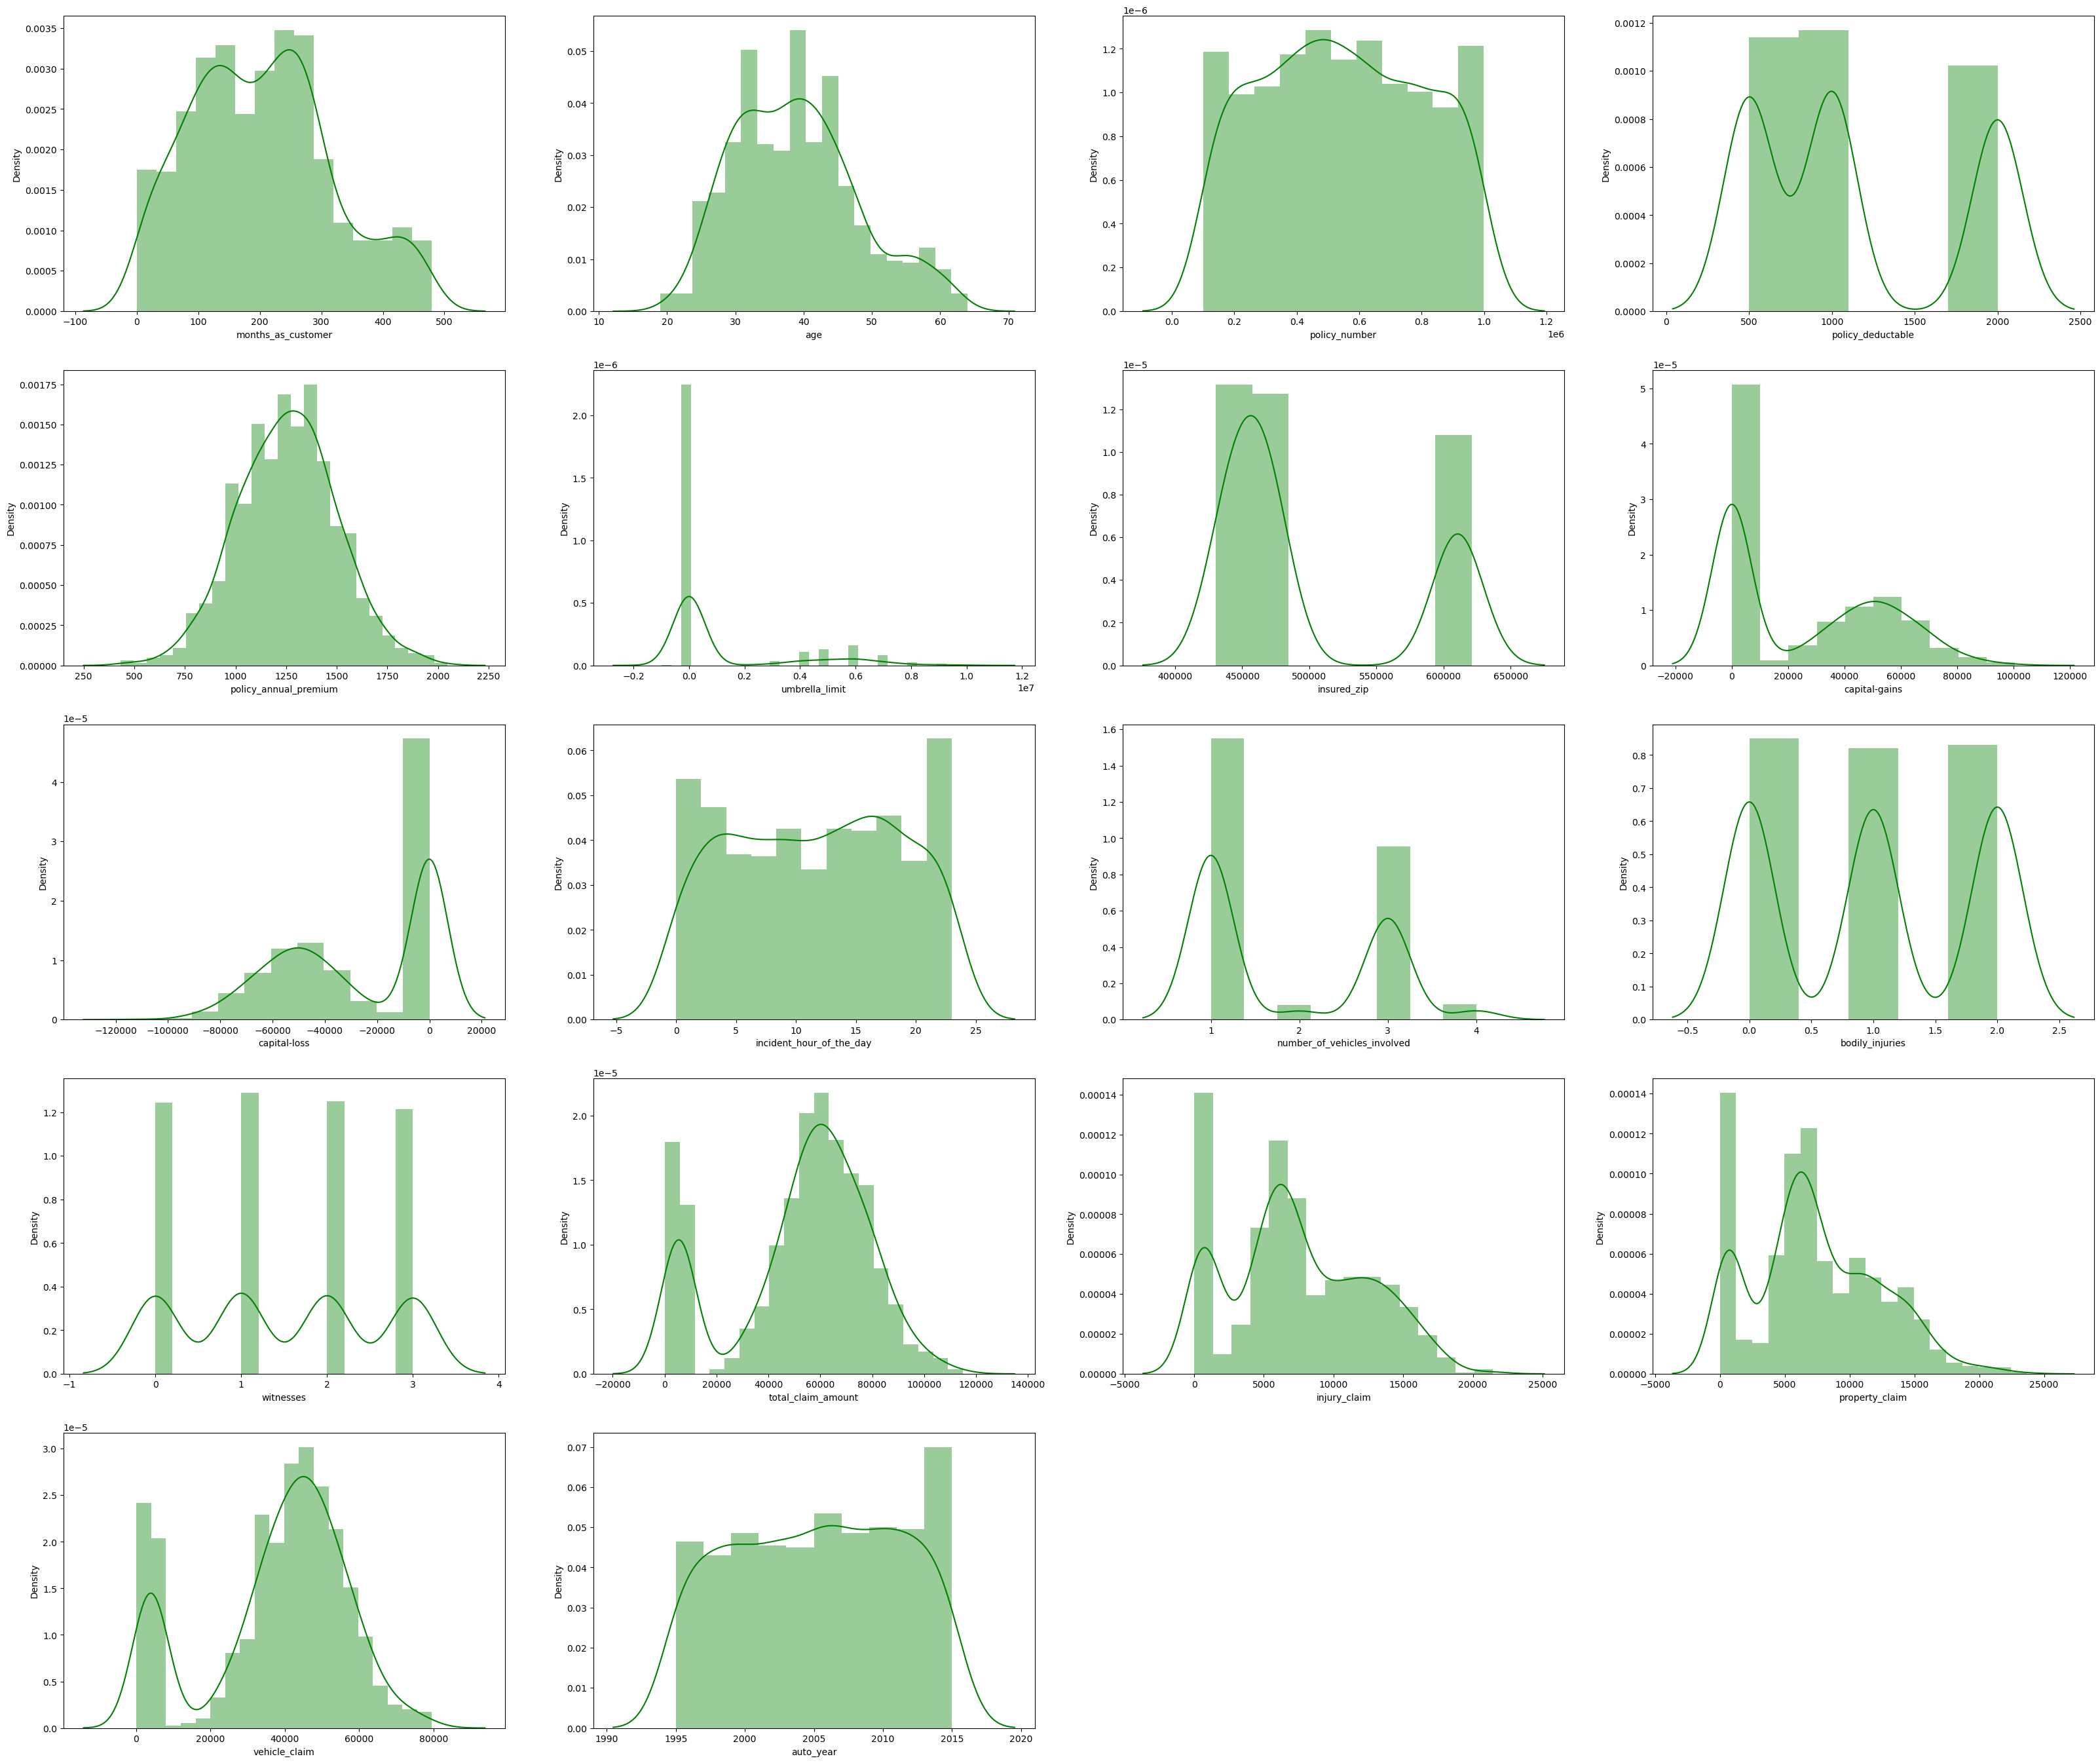

In [27]:
plt.figure(figsize=(40,55))
for i in enumerate(numerical_cols):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

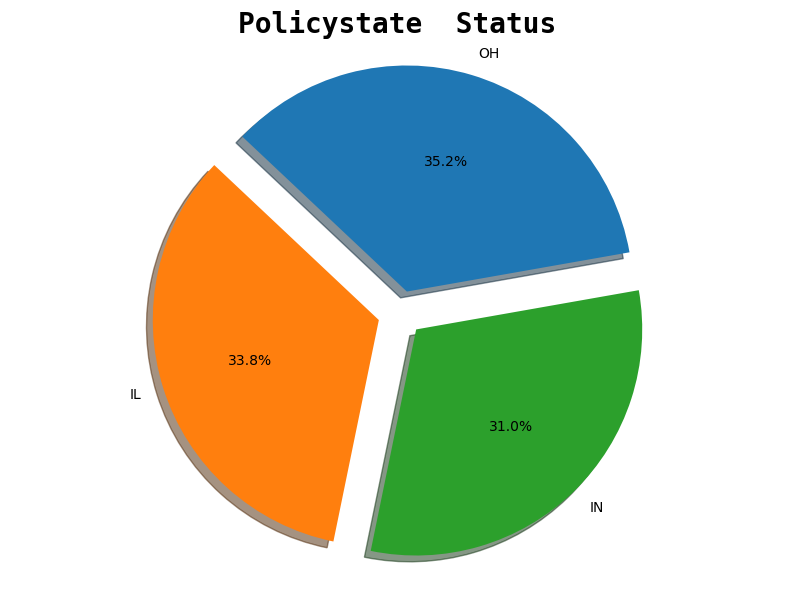

In [28]:
# Creating a pie chart for 'Policystate reported'
Policystate = df['policy_state'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))

# Adjust 'explode' based on the number of categories
explode = [0.1] * len(Policystate)

plt.pie(Policystate.values, labels=Policystate.index, startangle=10, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Policystate  Status', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.axis('equal')
plt.show()

In [29]:
df=df.replace("?",np.nan)
df=df.fillna(0)

In [30]:
df.head(4)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       0               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  

[4 rows x 39 columns]

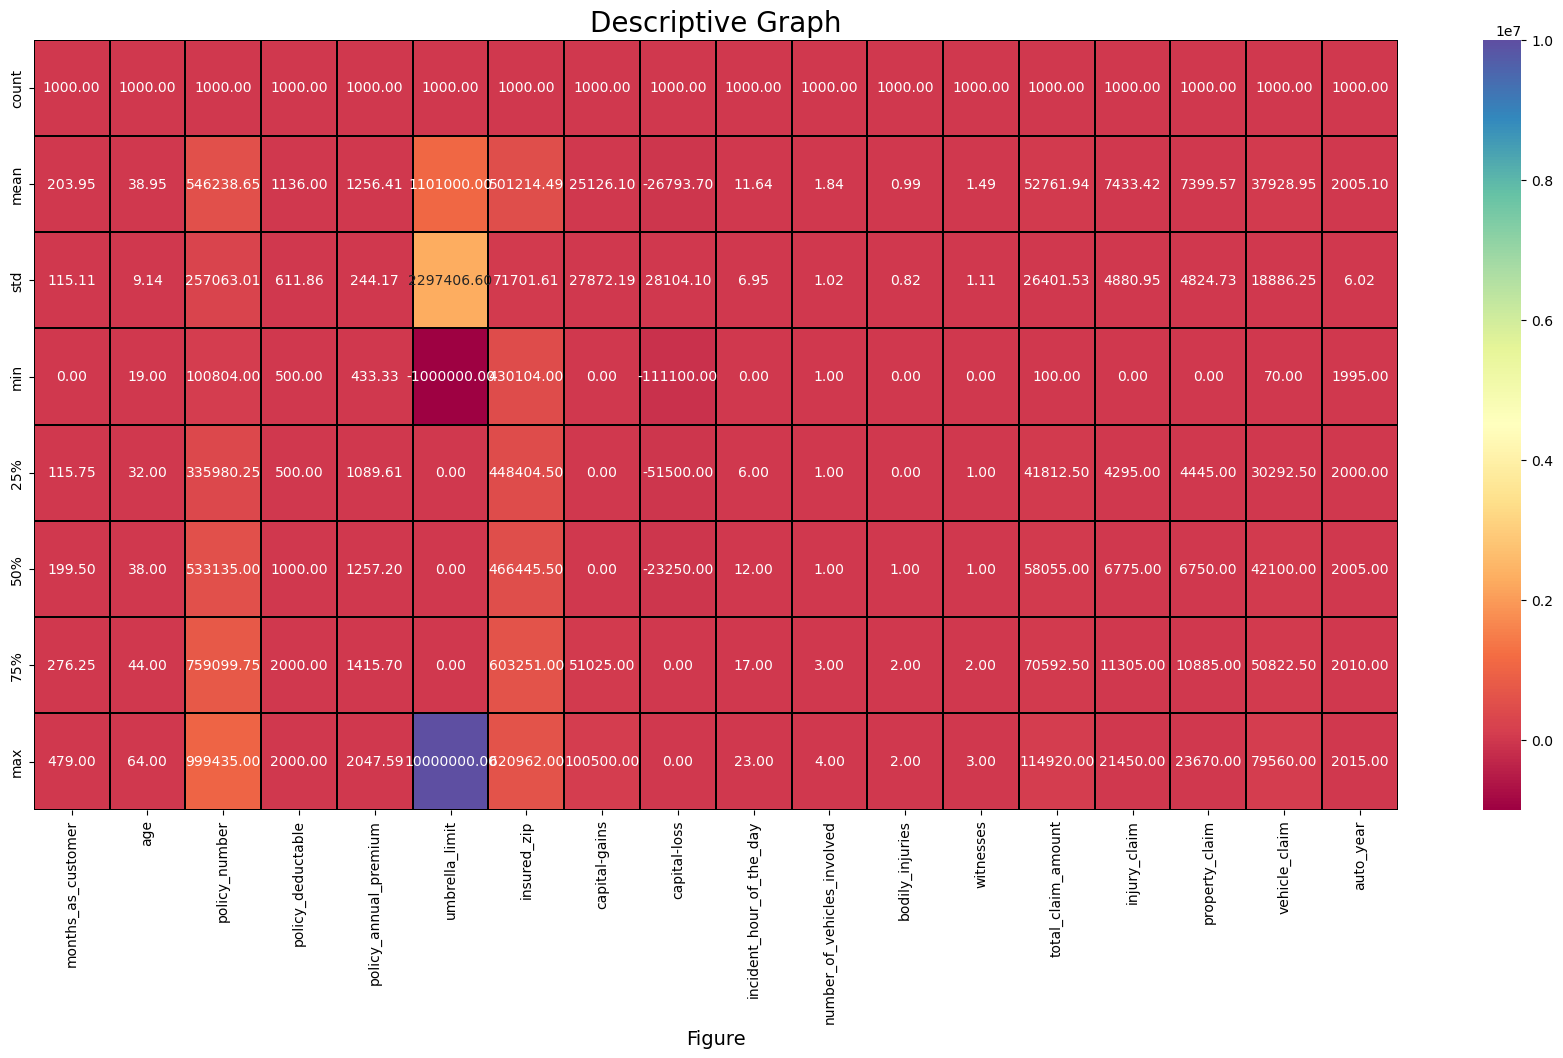

In [31]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

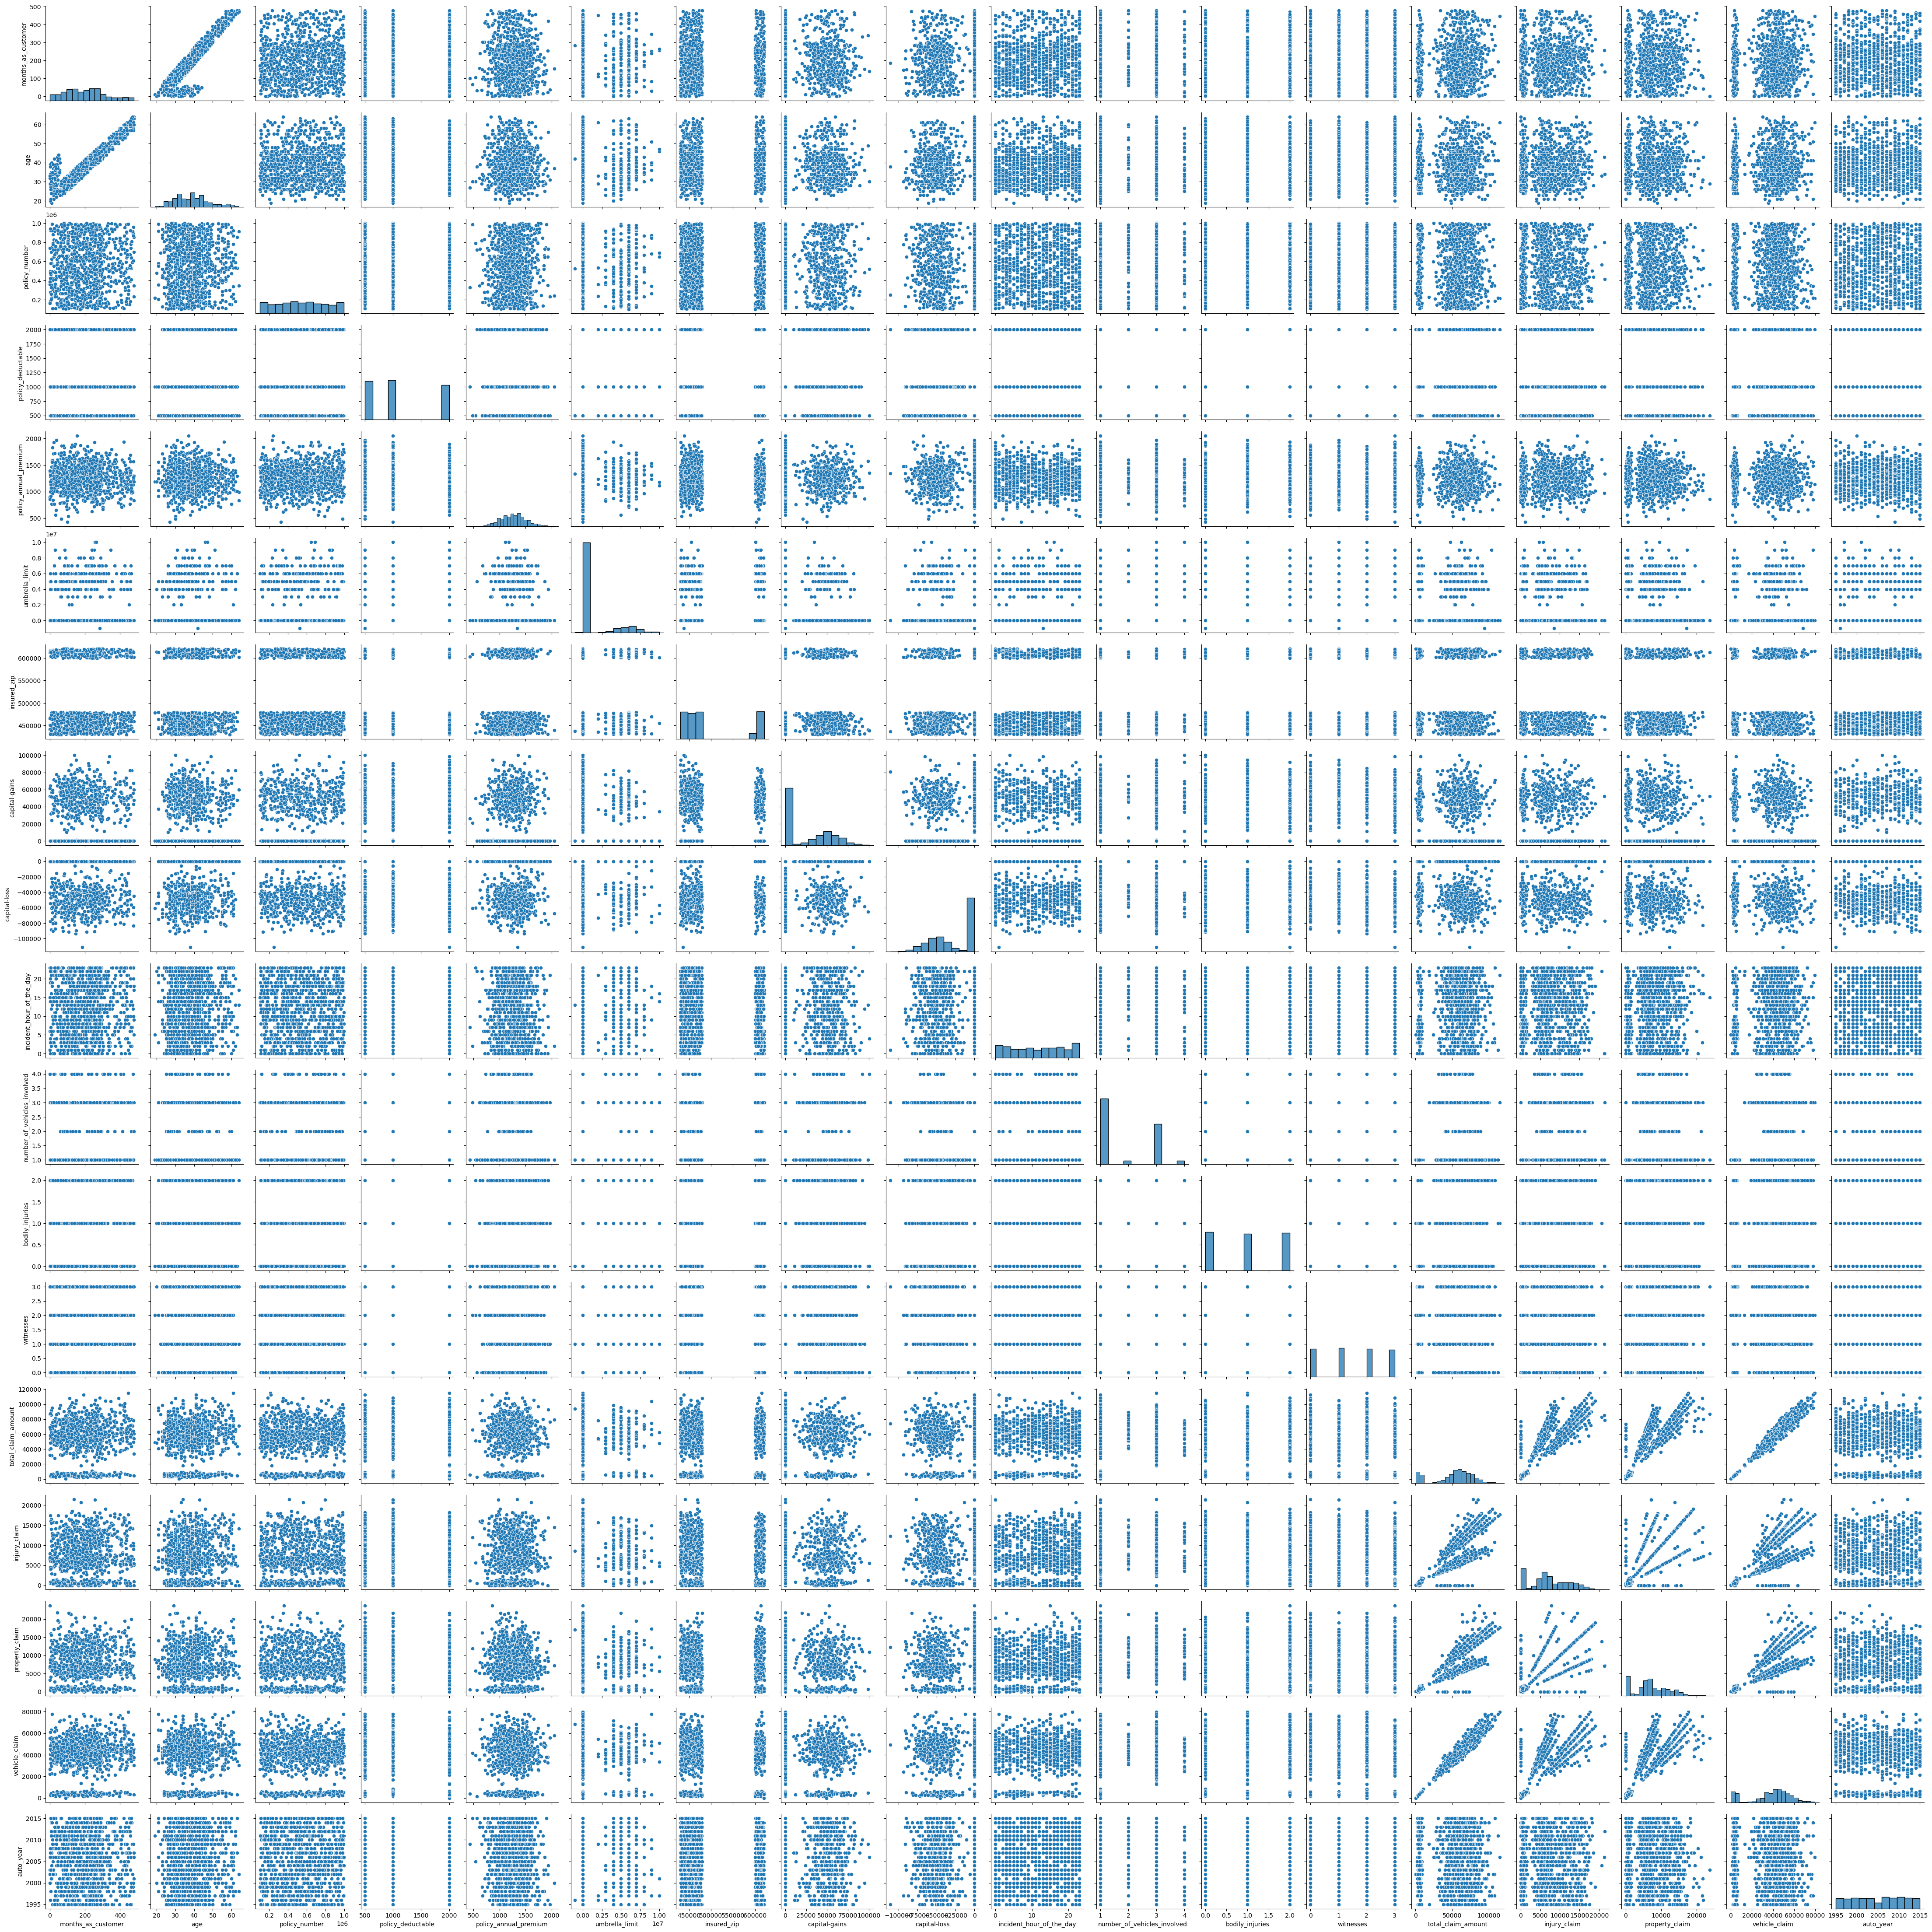

In [32]:
sns.pairplot(data=df,palette="Dark2")

<Axes: xlabel='policy_state', ylabel='count'>

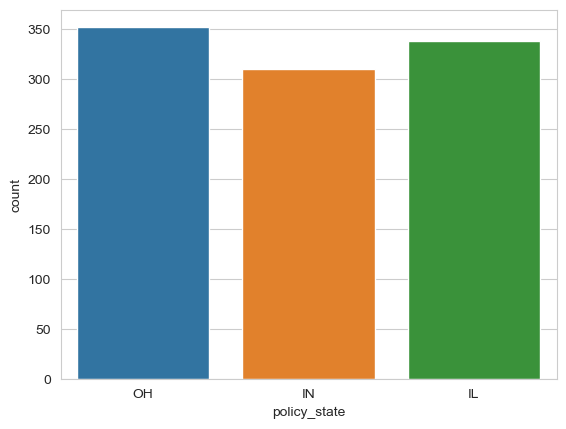

In [33]:
sns.set_style("whitegrid")
sns.countplot(x="policy_state", data=df)

<Axes: xlabel='police_report_available', ylabel='count'>

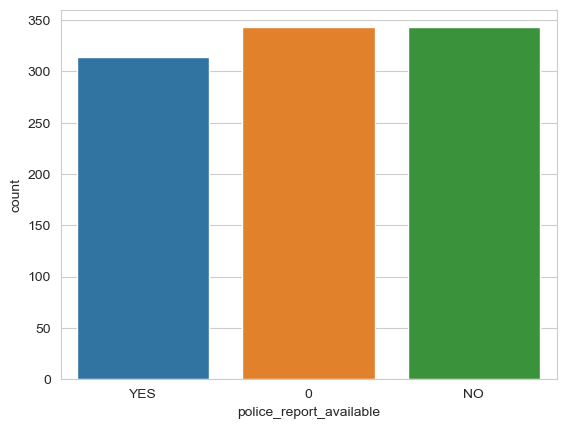

In [34]:
sns.set_style("whitegrid")
sns.countplot(x="police_report_available",data=df)

#from above data we can see that in maximum cases police report 

<Axes: xlabel='auto_make', ylabel='count'>

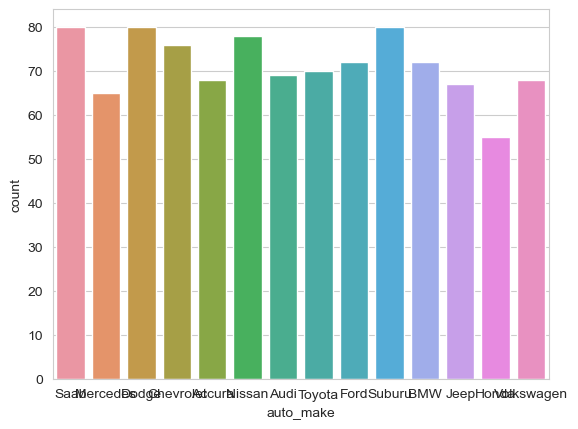

In [35]:
sns.set_style("whitegrid")
sns.countplot(x="auto_make",data=df)

<Axes: xlabel='auto_year', ylabel='injury_claim'>

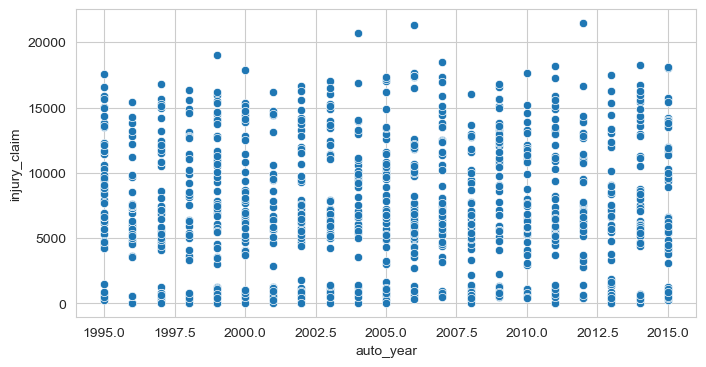

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='auto_year',y='injury_claim',data=df)

<Axes: xlabel='policy_deductable', ylabel='auto_year'>

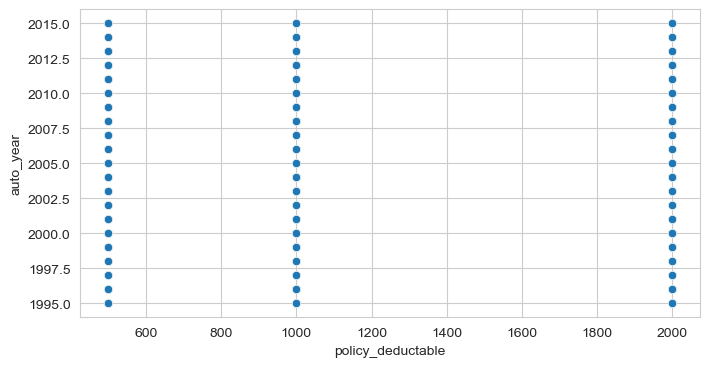

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='policy_deductable',y='auto_year',data=df)

N    753
Y    247
Name: fraud_reported, dtype: int64


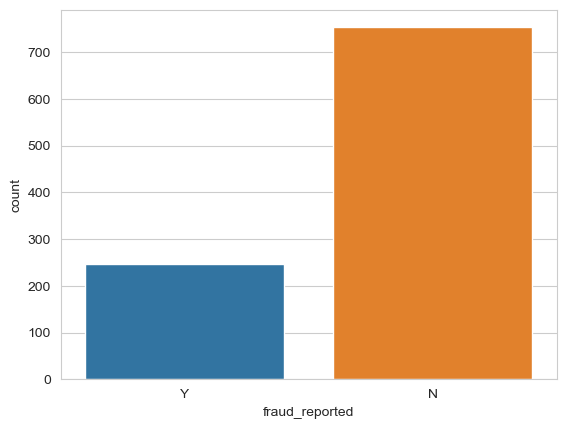

In [39]:
ax=sns.countplot(x="fraud_reported",data=df[categorical_cols])
print(df["fraud_reported"].value_counts())

#from above data we see there is imbalance in data, NO is higher than Yes in fraud_reported column

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


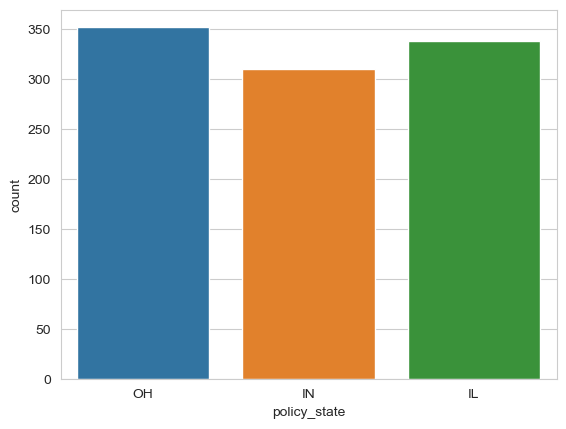

In [40]:
ax=sns.countplot(x="policy_state",data=df[categorical_cols])
print(df["policy_state"].value_counts())

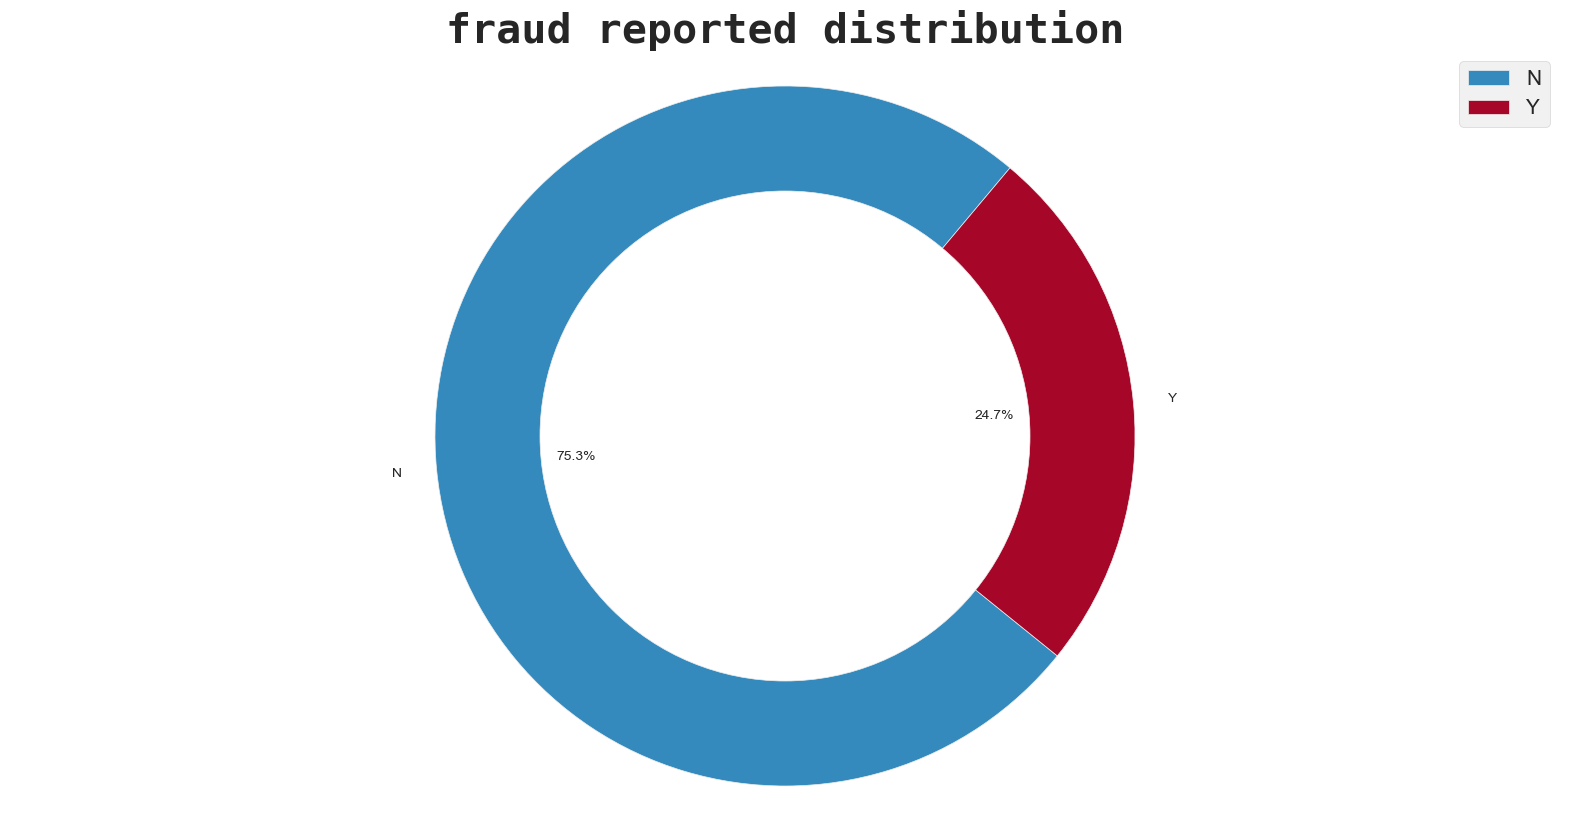

In [41]:
# Creating a donut chart for 'fraud reported'
relation = df['fraud_reported'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('fraud reported distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


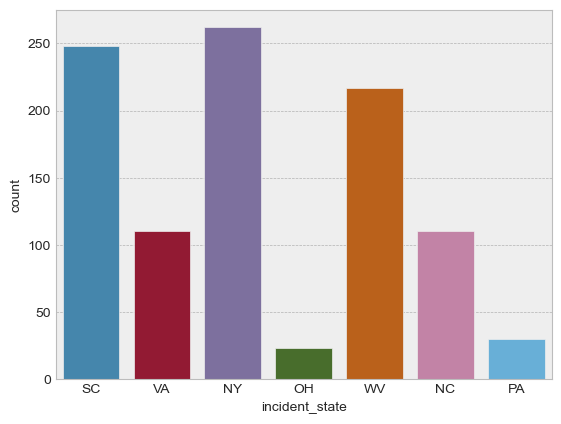

In [42]:
ax=sns.countplot(x="incident_state",data=df[categorical_cols])
print(df["incident_state"].value_counts())

#high incident occur in NY column

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


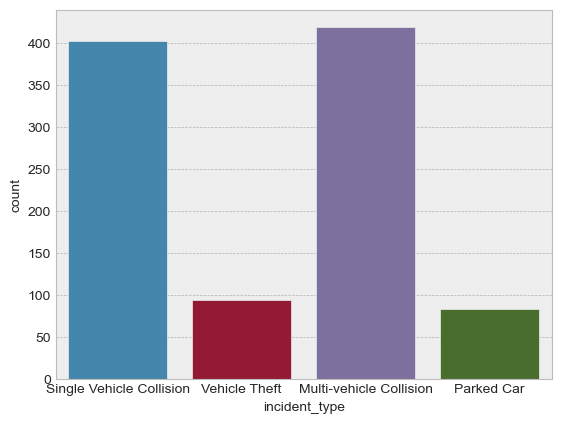

In [43]:
ax=sns.countplot(x="incident_type",data=df[categorical_cols])
print(df["incident_type"].value_counts())

#Above histogram shows that  maximum incident type is multi-vehicle-collision

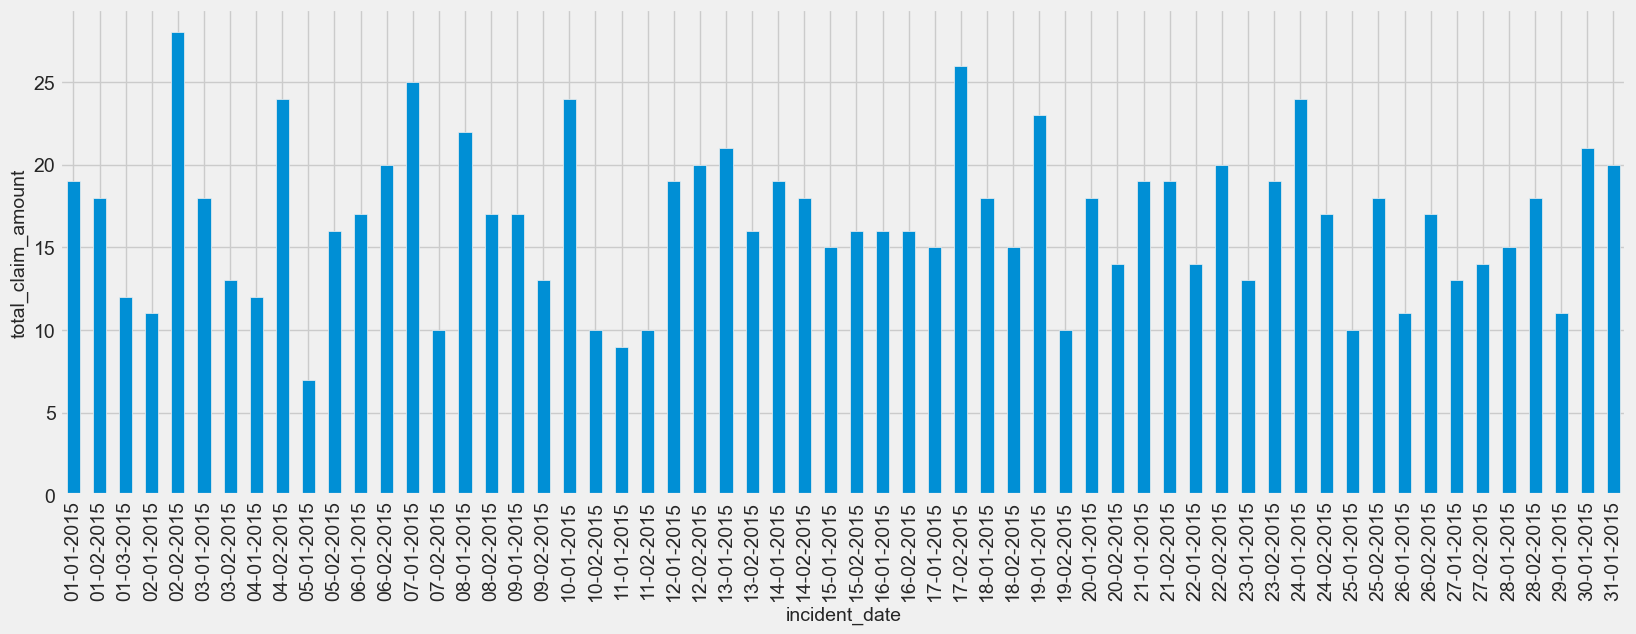

In [44]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('total_claim_amount')
plt.show()

#Maximum claim in February 2015

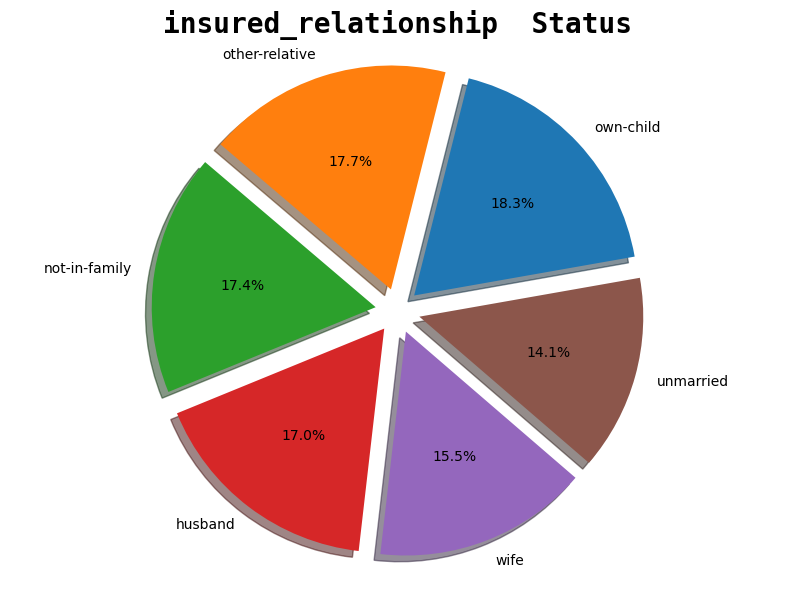

In [45]:
# Creating a pie chart for 'insured relationship Status'
insured= df['insured_relationship'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))

# Adjust 'explode' based on the number of categories
explode = [0.1] * len(insured)

plt.pie(insured.values, labels=insured.index, startangle=10, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('insured_relationship  Status', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.axis('equal')
plt.show()

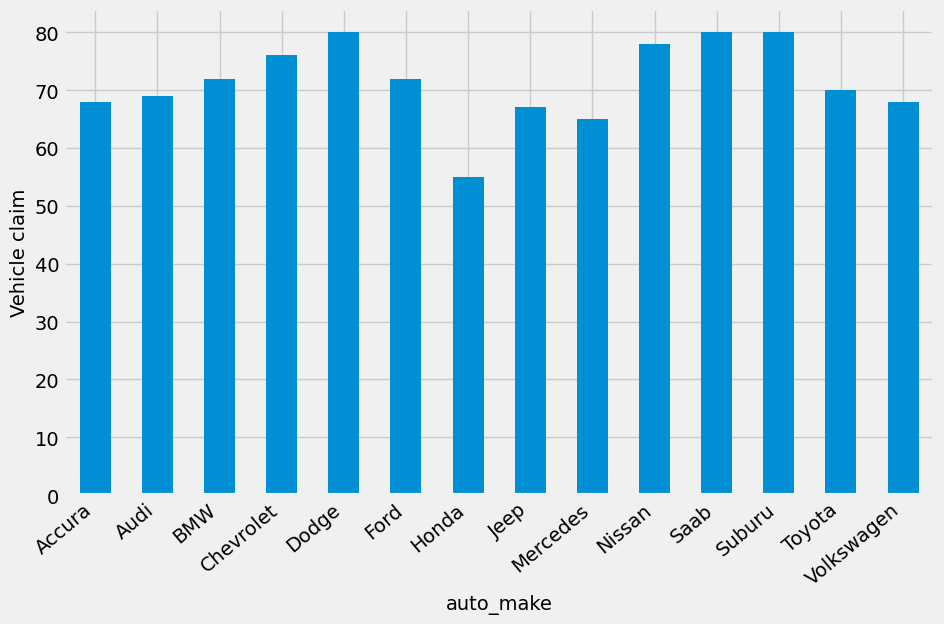

In [46]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [47]:
df['property_damage'].replace(to_replace='?', value=0, inplace=True)

In [48]:
df['police_report_available'].replace(to_replace='?', value=0, inplace=True)

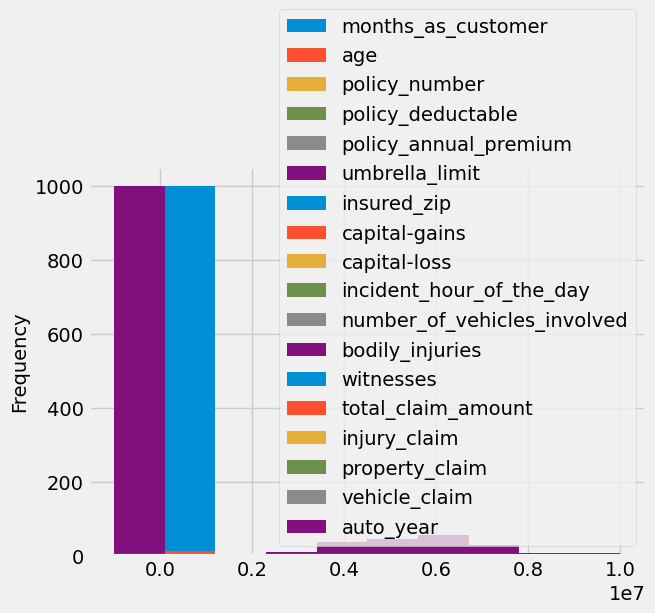

In [49]:
# Generate a Histogram plot for anomaly detection
df.plot(kind='hist')
plt.show()

<Axes: xlabel='policy_state', ylabel='count'>

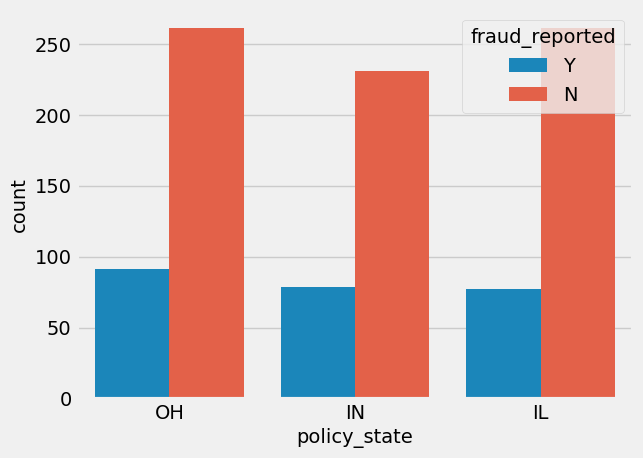

In [50]:
sns.countplot(x="policy_state",data=df,hue="fraud_reported")

<Axes: xlabel='incident_type', ylabel='count'>

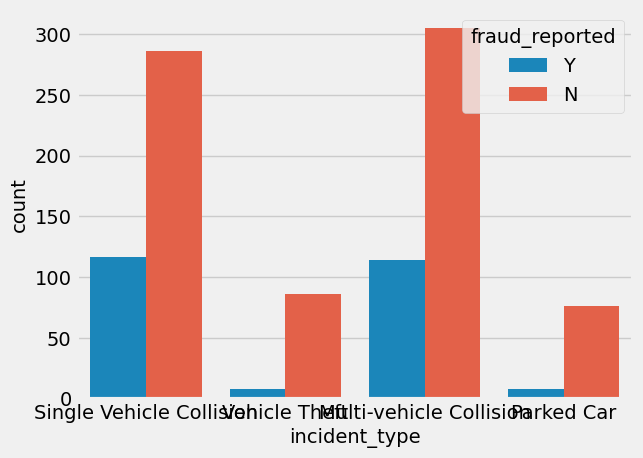

In [51]:
sns.countplot(x="incident_type",data=df,hue="fraud_reported")

<Axes: xlabel='incident_state', ylabel='count'>

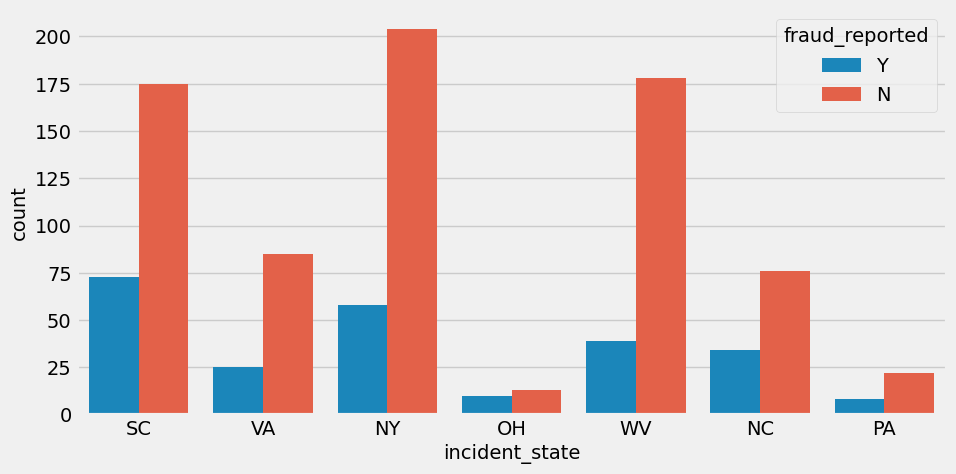

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x="incident_state",data=df,hue="fraud_reported")

<Axes: xlabel='incident_type', ylabel='count'>

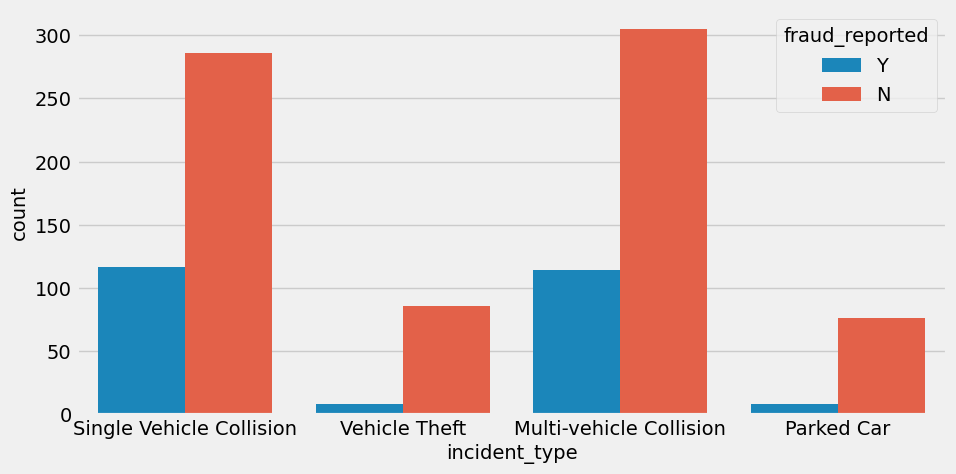

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x="incident_type",data=df,hue="fraud_reported")

In [54]:
df.police_report_available.value_counts()

0      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [55]:
df.property_damage.value_counts()

0      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [56]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
0                  178
Name: collision_type, dtype: int64

In [57]:
df.replace("?",np.nan,inplace=True)

In [58]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
1ncident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [59]:
df["police_report_available"]=df["police_report_available"].fillna(df["police_report_available"].mode([0]))
df["property_damage"]=df["property_damage"].fillna(df["property_damage"].mode([0]))
df["collision_type"]=df["collision_type"].fillna(df["collision_type"].mode([0]))

In [60]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [61]:
for i in df[categorical_cols]:
    df[i] = df[i].astype(str)  # Convert all values to strings
    df[i] = le.fit_transform(df[i])  # Encode the column

In [62]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
..                  ...  ...            ...               ...           ...   
995                   3   38         941851               487             2   
996                 285   41         186934               129             0   
997                 130   34         918516               509             2   
998                 458   62         533940               573             0   
999                 456   60         556080               359             2   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0             1               1000                1406.91               0   
1             1               2000                1197.22         5000000   
2             0               2000                1413.14         5000000   
3             1               2000                1415.74         6000000   
4             2               1000                1583.91         6000000   
..          ...                ...                    ...             ...   
995           2               1000                1310.80               0   
996           0               1000                1436.79               0   
997           1                500                1383.49         3000000   
998           2               2000                1356.92         5000000   
999           1               1000                 766.19               0   

     insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0         466132  ...          2                        2               71610   
1         468176  ...          0                        0                5070   
2         430632  ...          3                        1               34650   
3         608117  ...          2                        1               63400   
4         610706  ...          1                        1                6500   
..           ...  ...        ...                      ...                 ...   
995       431289  ...          1                        0               87200   
996       608177  ...          3                        0              108480   
997       442797  ...          3                        2               67500   
998       441714  ...          1                        2               46980   
999       612260  ...          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0            6510           13020          52080         10           1   
1             780             780           3510          8          12   
2            7700            3850          23100          4          30   
3            6340            6340          50720          3          34   
4            1300             650           4550          0          31   
..            ...             ...            ...        ...         ...   
995         17440            8720          61040          6           6   
996         18080           18080          72320         13          28   
997          7500            7500          52500         11          19   
998          5220            5220          36540          1           5   
999           460             920           3680          8          12   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
4         2009               0  
..         ...             ...  
995       2006            

In [63]:
corrs=df.corr()["fraud_reported"]
columns=corrs[corrs>.001].index
corrs=corrs.filter(columns)
corrs.sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
Name: fraud_reported, dtype: float64

# Highest correlation is Vehicle Claim

In [64]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       '1ncident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [65]:
feature=['months_as_customer','policy_state','umbrella_limit','total_claim_amount','insured_sex','witnesses','number_of_vehicles_involved','bodily_injuries','insured_relationship','property_damage','bodily_injuries','vehicle_claim']


In [66]:
x=df[feature]
y=df.fraud_reported   

In [67]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# Balance Fraud_reported column Data with the help of imblearn

In [68]:
from imblearn.over_sampling import SMOTE

In [73]:
sm=SMOTE()

In [74]:
x,y=sm.fit_resample(x,y)

In [75]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

# import important Libraries

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [81]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.14737644,  1.34526837, -0.52380707, ...,  1.50546803,
         0.11115365,  0.67813383],
       [ 0.22469154,  0.1084099 ,  1.51993191, ..., -1.02210706,
        -1.15700843, -2.1110283 ],
       [-0.64263226,  1.34526837,  1.51993191, ...,  0.24168049,
         1.37931573, -0.9860605 ],
       ...,
       [ 0.54763125, -1.12844856,  1.11118412, ..., -1.02210706,
         1.37931573,  0.2393447 ],
       [ 0.19701099, -1.12844856, -0.52380707, ..., -1.02210706,
         0.11115365, -0.29017689],
       [-0.84562294, -1.12844856, -0.52380707, ..., -1.02210706,
        -1.15700843,  0.36671472]])

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=420)

In [95]:
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of y_train :",y_train.shape)
print("Size of x_test :",y_test.shape)

Size of x_train : (1280, 12)
Size of x_test : (226, 12)
Size of y_train : (1280,)
Size of x_test : (226,)


In [112]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(420):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print("Best score:",maxAcc)
print("Random State:",rs)

Best score: 0.7549668874172185
Random State: 8


In [113]:
def classify(clf,x,y):
    
    #training the model
    clf.fit(x_train,y_train)
    
    #predicting Y_Test
    pred=clf.predict(x_test)
    
    #Accuracy Score
    acc_score =(accuracy_score(y_test,pred))
    print ("Accuracy Score:",acc_score)
    
    #confusion matrix:
    print("confusion matrix:\n",confusion_matrix(y_test,pred))
    
    #classification report
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    #cross validation score
    cv_score =(cross_val_score(clf,x,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #result of accuracy minus cv scores
    result=acc_score-cv_score
    print("\nAccuracy Score - Cross Validation Score is ",result)

In [114]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.7284768211920529
confusion matrix:
 [[55 25]
 [16 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73        80
           1       0.69      0.77      0.73        71

    accuracy                           0.73       151
   macro avg       0.73      0.73      0.73       151
weighted avg       0.73      0.73      0.73       151

Cross Validation Score: 0.6786825372379046

Accuracy Score - Cross Validation Score is  0.04979428395414831


In [115]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.7748344370860927
confusion matrix:
 [[63 17]
 [17 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        80
           1       0.76      0.76      0.76        71

    accuracy                           0.77       151
   macro avg       0.77      0.77      0.77       151
weighted avg       0.77      0.77      0.77       151

Cross Validation Score: 0.764372621064443

Accuracy Score - Cross Validation Score is  0.01046181602164964


In [116]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.6887417218543046
confusion matrix:
 [[51 29]
 [18 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.68        80
           1       0.65      0.75      0.69        71

    accuracy                           0.69       151
   macro avg       0.69      0.69      0.69       151
weighted avg       0.70      0.69      0.69       151

Cross Validation Score: 0.6667092033178588

Accuracy Score - Cross Validation Score is  0.022032518536445833


In [117]:
clf=GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.7019867549668874
confusion matrix:
 [[55 25]
 [20 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        80
           1       0.67      0.72      0.69        71

    accuracy                           0.70       151
   macro avg       0.70      0.70      0.70       151
weighted avg       0.70      0.70      0.70       151

Cross Validation Score: 0.7212008536665862

Accuracy Score - Cross Validation Score is  -0.0192140986996987


In [118]:
clf=AdaBoostClassifier()
classify(clf,x,y)

Accuracy Score: 0.6887417218543046
confusion matrix:
 [[56 24]
 [23 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70        80
           1       0.67      0.68      0.67        71

    accuracy                           0.69       151
   macro avg       0.69      0.69      0.69       151
weighted avg       0.69      0.69      0.69       151

Cross Validation Score: 0.6846758047127676

Accuracy Score - Cross Validation Score is  0.004065917141537034


In [119]:
clf=SVC()
classify(clf,x,y)

Accuracy Score: 0.6887417218543046
confusion matrix:
 [[58 22]
 [25 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71        80
           1       0.68      0.65      0.66        71

    accuracy                           0.69       151
   macro avg       0.69      0.69      0.69       151
weighted avg       0.69      0.69      0.69       151

Cross Validation Score: 0.6926448262964511

Accuracy Score - Cross Validation Score is  -0.0039031044421464767


In [120]:
import xgboost as xgb

In [121]:
clf=xgb.XGBClassifier()
classify(clf,x,y)

Accuracy Score: 0.7615894039735099
confusion matrix:
 [[58 22]
 [14 57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76        80
           1       0.72      0.80      0.76        71

    accuracy                           0.76       151
   macro avg       0.76      0.76      0.76       151
weighted avg       0.77      0.76      0.76       151

Cross Validation Score: 0.7451035180744098

Accuracy Score - Cross Validation Score is  0.01648588589910016


In [122]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.7880794701986755
Confusion Matrix
 [[65 15]
 [17 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        80
           1       0.78      0.76      0.77        71

    accuracy                           0.79       151
   macro avg       0.79      0.79      0.79       151
weighted avg       0.79      0.79      0.79       151



# Hyper Parameter Tuning RandomForestClassifier 

In [123]:
from sklearn.model_selection import GridSearchCV

In [126]:
#Number of trees in random forest
n_estimators=[20,60,100,120]

#Number of features to consider at every split
max_features=[0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth=[2,8,None]

#Number of samples
max_samples=[0.5,0.75,1.0]

In [127]:
param_grid={"n_estimators":n_estimators,
           "max_features":max_features,
           "max_depth":max_depth,
           "max_samples":max_samples
           }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [128]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=5,verbose=2,
                    n_jobs=-1)

In [129]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [130]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 100}

In [131]:
rf_grid.best_score_

0.7756457564575647

In [132]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

Text(0.5, 0, 'False Positive Rate')

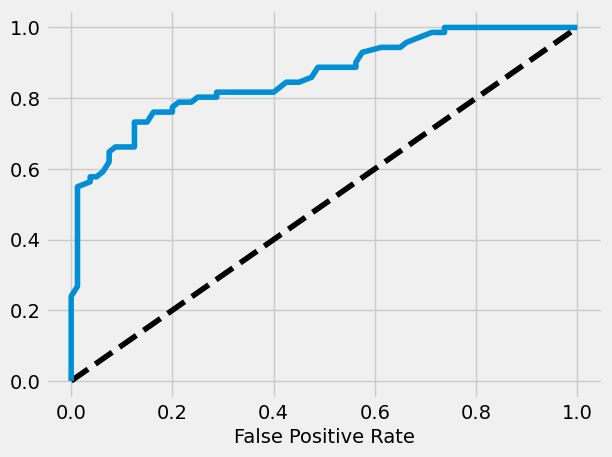

In [133]:
#predicting the probability of having 1 in the x-test
rf.fit(x_train, y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False Positive Rate")

In [135]:
import pickle

In [136]:
filename="Insurance Claim Fraud Detection.pkl"

In [137]:
pickle.dump(rf,open(filename,"wb"))

In [138]:
#Conclusion
loaded_model=pickle.load(open("Insurance Claim Fraud Detection.pkl","rb"))

In [139]:
result=loaded_model.score(x_test,y_test)

In [140]:
print(result*100)

78.1456953642384


In [141]:
#conclusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Origional"])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  141  142  \
Predicted    0    1    0    0    1    0    1    1    1    1  ...    1    0   
Origional    0    1    0    0    1    0    1    1    1    1  ...    1    0   

           143  144  145  146  147  148  149  150  
Predicted    0    1    1    0    1    1    1    0  
Origional    0    1    1    0    1    1    1    0  

[2 rows x 151 columns]

In [142]:
rf.predict(x_test)

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [143]:
rf.score(x_test,y_test)

0.7814569536423841

In [144]:
rf.predict_proba(x_test)

array([[0.63, 0.37],
       [0.12, 0.88],
       [0.71, 0.29],
       [0.7 , 0.3 ],
       [0.43, 0.57],
       [0.78, 0.22],
       [0.15, 0.85],
       [0.21, 0.79],
       [0.29, 0.71],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.31, 0.69],
       [0.67, 0.33],
       [0.16, 0.84],
       [0.7 , 0.3 ],
       [0.63, 0.37],
       [0.68, 0.32],
       [0.53, 0.47],
       [0.68, 0.32],
       [0.29, 0.71],
       [0.27, 0.73],
       [0.87, 0.13],
       [0.64, 0.36],
       [0.11, 0.89],
       [0.82, 0.18],
       [0.88, 0.12],
       [0.88, 0.12],
       [0.59, 0.41],
       [0.14, 0.86],
       [0.98, 0.02],
       [0.84, 0.16],
       [0.63, 0.37],
       [0.44, 0.56],
       [0.05, 0.95],
       [0.11, 0.89],
       [0.29, 0.71],
       [0.25, 0.75],
       [0.71, 0.29],
       [0.56, 0.44],
       [0.34, 0.66],
       [0.74, 0.26],
       [0.24, 0.76],
       [0.41, 0.59],
       [0.95, 0.05],
       [0.1 , 0.9 ],
       [0.19, 0.81],
       [0.59, 0.41],
       [0.96,